# 🧠 **Understanding ADHD**

## 🧐 **Understudied Brains' of Women**

**1. How does menopause affect women's brains?**

**2. Why are women more likely to develop Alzheimer's than men?**  

**3. Why does dementia manifest differently in women versus men?**

**4. The Alzheimer's drug Lepembi slows cognitive decline by 12% in women, compared to 43% in men.** 

## 🎯 **Goals & Tasks:**

**1. Provide insights by means of Data.**

**2. Understanding ADHD in women and children.**

**3. Advancing personalized medicine for neurodevelopmental disorders through an effective model.** 

## ⚖️ **Measurements (Feature Variables):**

## 💡 **Target Variables:**

1. **ADHD Diagnosis (ADHD_Outcome)** 
2. **Biological Sex (Sex_F)**  

##  🗂️  ***Import Libraries***  

In [1]:
import os

import pandas as pd
import numpy as np

import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp 
sns.set() 

from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


import warnings 
warnings.filterwarnings('ignore')  

In [2]:
os.listdir('/kaggle/input/adhd-train-data')   
os.listdir('/kaggle/input/adhd-solutions')  
os.listdir('/kaggle/input/functional-matrices')   

['TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv']

##  ⏳ ***Data Loading & Merging***  

In [3]:
df_quan = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_QUANTITATIVE .xlsx')   
df_cat = pd.read_excel('/kaggle/input/adhd-train-data/TRAIN_CATEGORICAL.xlsx') 
df_solu = pd.read_excel('/kaggle/input/adhd-solutions/TRAINING_SOLUTIONS.xlsx')
df_func = pd.read_csv('/kaggle/input/functional-matrices/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv')

In [4]:
df = df_quan.merge(df_cat, on='participant_id', how='inner').merge(
                                                                    df_solu, 
                                                                    on='participant_id', 
                                                                    how='inner')

## 🔭 ***Data Exploration (EDA)***  

### 🔍 **1. Info & Dtype of Data**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   EHQ_EHQ_Total                     1200 non-null   float64
 2   ColorVision_CV_Score              1190 non-null   float64
 3   APQ_P_APQ_P_CP                    1201 non-null   float64
 4   APQ_P_APQ_P_ID                    1201 non-null   float64
 5   APQ_P_APQ_P_INV                   1201 non-null   float64
 6   APQ_P_APQ_P_OPD                   1201 non-null   float64
 7   APQ_P_APQ_P_PM                    1201 non-null   float64
 8   APQ_P_APQ_P_PP                    1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems          1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total        1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems        1204 non-null   float64
 12  SDQ_SD

### 🔍 **2.Take a Glimpse of Data**

In [6]:
df.head(5).T   

,0,1,2,3,4
participant_id,00aIpNTbG5uh,00fV0OyyoLfw,04X1eiS79T4B,05ocQutkURd6,06YUNBA9ZRLq
EHQ_EHQ_Total,100.0,92.27,86.67,93.34,0.0
ColorVision_CV_Score,13.0,14.0,14.0,14.0,14.0
APQ_P_APQ_P_CP,3.0,3.0,3.0,3.0,8.0
APQ_P_APQ_P_ID,15.0,12.0,21.0,11.0,12.0
APQ_P_APQ_P_INV,44.0,35.0,37.0,42.0,35.0
APQ_P_APQ_P_OPD,14.0,25.0,18.0,15.0,22.0
APQ_P_APQ_P_PM,20.0,28.0,26.0,20.0,12.0
APQ_P_APQ_P_PP,27.0,30.0,28.0,28.0,24.0
SDQ_SDQ_Conduct_Problems,3.0,5.0,3.0,0.0,6.0


### 🔍 **3. Descriptive Statistics**

In [7]:
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
EHQ_EHQ_Total,1200.0,59.514750,49.744631,-100.0,46.670000,77.800000,94.470000,100.000000
ColorVision_CV_Score,1190.0,13.419328,2.112830,0.0,14.000000,14.000000,14.000000,14.000000
APQ_P_APQ_P_CP,1201.0,3.819317,1.330348,2.0,3.000000,3.000000,4.000000,12.000000
APQ_P_APQ_P_ID,1201.0,13.337219,3.593562,5.0,11.000000,13.000000,16.000000,28.000000
APQ_P_APQ_P_INV,1201.0,39.767694,4.872729,23.0,36.000000,40.000000,43.000000,50.000000
APQ_P_APQ_P_OPD,1201.0,17.963364,3.333965,7.0,16.000000,18.000000,20.000000,28.000000
APQ_P_APQ_P_PM,1201.0,16.557036,5.146548,5.0,13.000000,16.000000,19.000000,37.000000
APQ_P_APQ_P_PP,1201.0,25.498751,3.053720,13.0,23.000000,26.000000,28.000000,30.000000
SDQ_SDQ_Conduct_Problems,1204.0,2.074751,2.022992,0.0,0.000000,2.000000,3.000000,10.000000
SDQ_SDQ_Difficulties_Total,1204.0,12.213455,6.517330,0.0,7.000000,12.000000,17.000000,34.000000


### 🔍 **4. Dimensions of DataFrame**

In [8]:
print(f'Rows: {df.shape[0]}') 
print(f'Colums: {df.shape[1]}')     

Rows: 1213
Colums: 30


### 🔍 **5. Check Duplicated & Missing Values** 

In [9]:
print(f'Duplicated: {df.duplicated().sum()}') 

Duplicated: 0


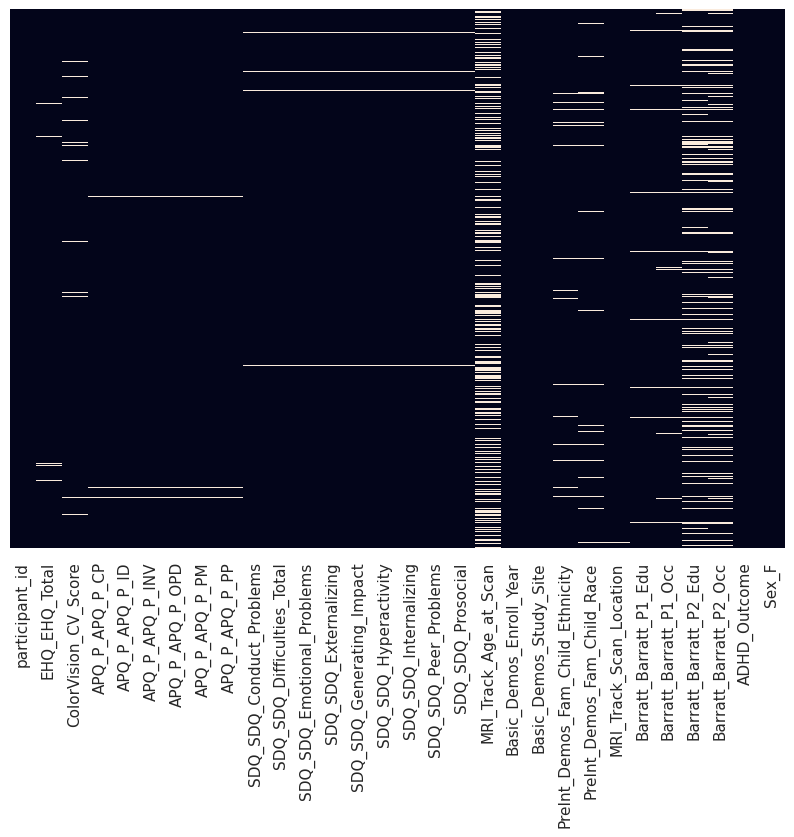

In [10]:
plt.figure(figsize=(10,7)) 

sns.heatmap(df.isnull(), yticklabels=False, cbar=False) 
plt.show() 

### 🔍 **6. Looking for Correlations**

In [11]:
df.drop('participant_id', axis=1, inplace=True) 

<Axes: >

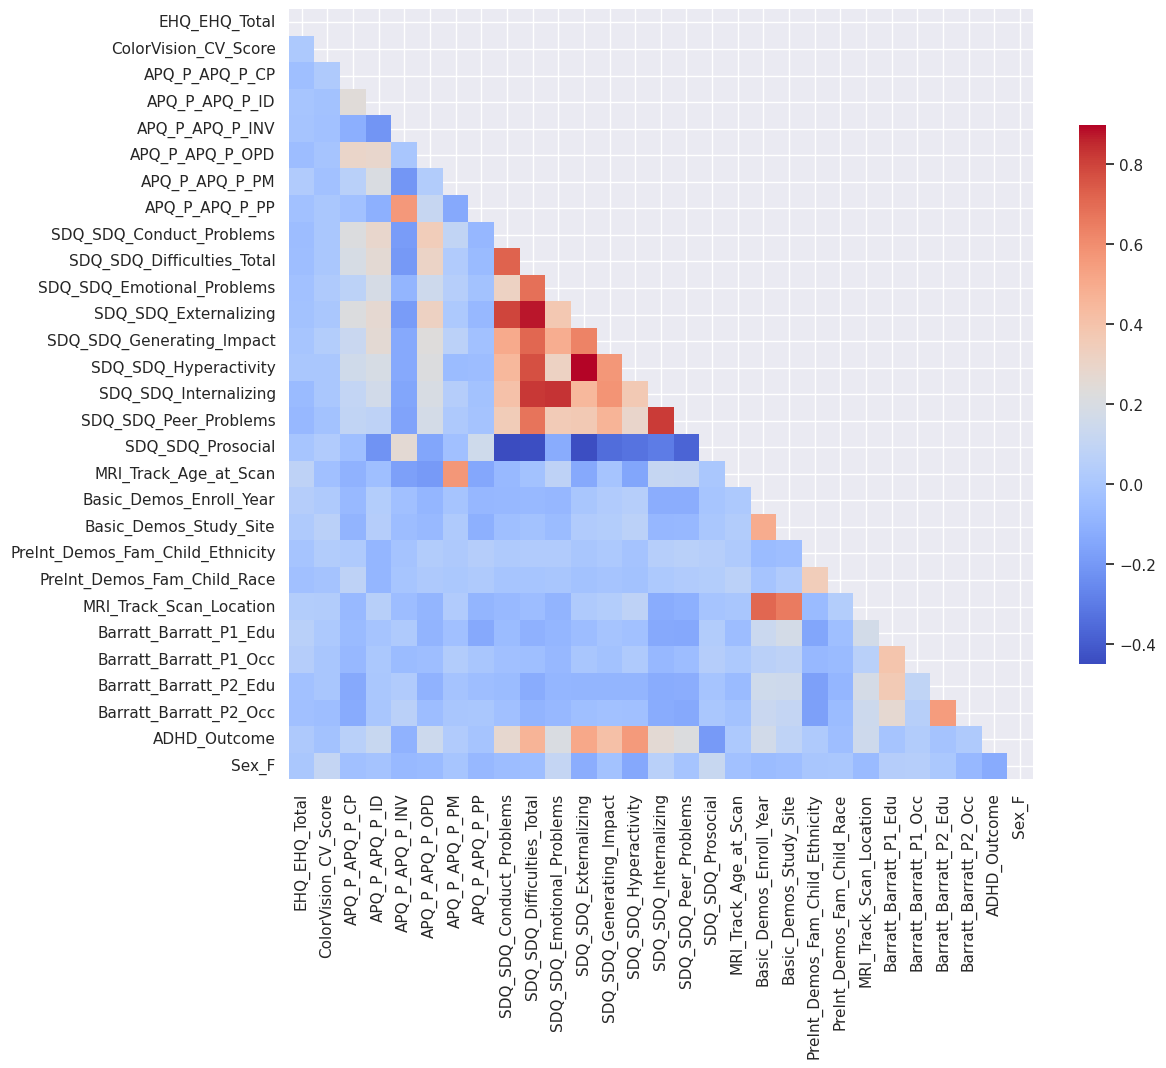

In [12]:
corr_matrix = df.corr() 

mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix,
            mask=mask,
            cmap='coolwarm',
            cbar_kws={"shrink": .7})   

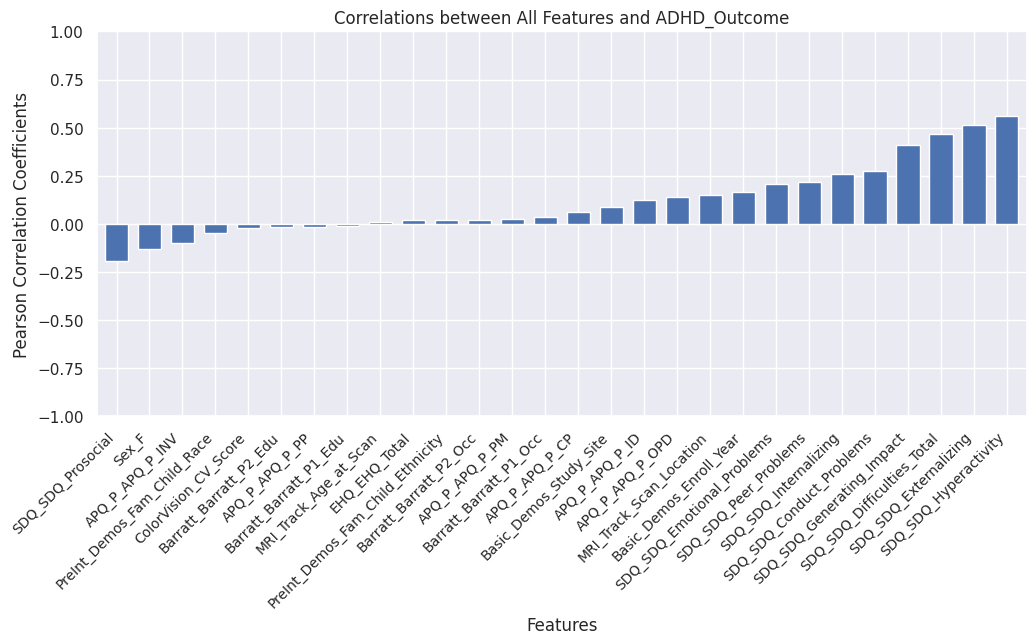

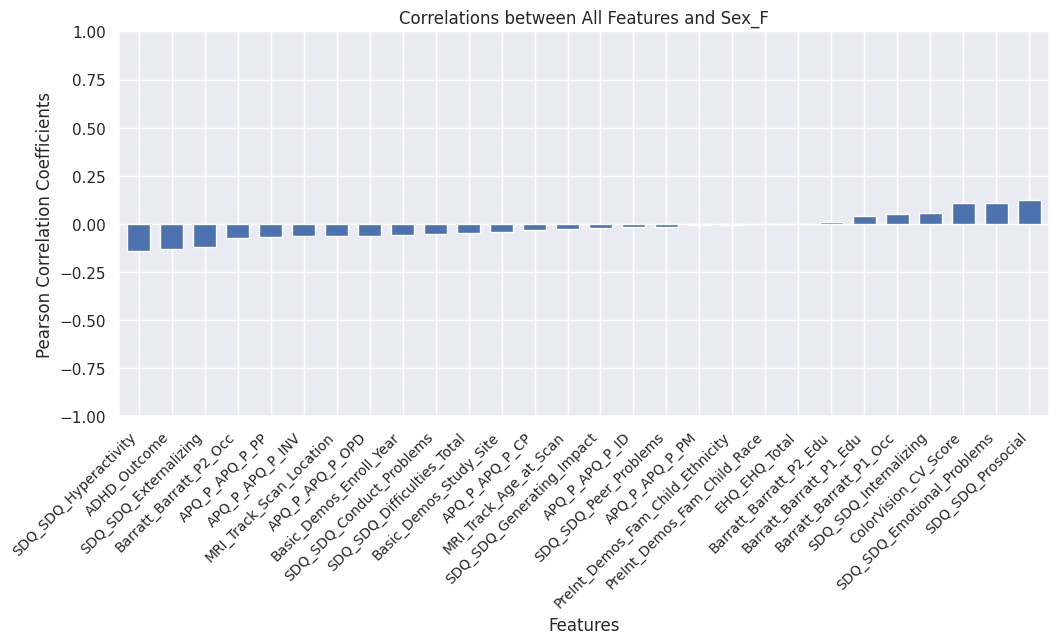

In [13]:
target_cols = ['ADHD_Outcome', 'Sex_F'] 

for col in target_cols:
    correlations = corr_matrix[col].drop([col]).sort_values()  
    fig = plt.figure(figsize=(12,5)) 
    ax = correlations.plot(kind='bar', width=0.7) 

    ax.set(ylim=[-1, 1]) 
    ax.set(ylabel='Pearson Correlation Coefficients',
           xlabel= 'Features')
    
    ax.set_xticklabels(correlations.index, 
                       rotation=45,
                       ha='right',
                       fontsize=10) 
    
    ax.set_title(f'Correlations between All Features and {col}')  

##  🔨***Data Cleaning & Preprocessing***  

### 🔍 **1. Handling Numerical Attributes**

In [14]:
missing = pd.DataFrame({ 'No.of Missing Values': df.isna().sum().sort_values(ascending=False),
                         '% of Missing Values': (df.isna().mean() * 100).sort_values(ascending=False),
                       })

missing.index.name = 'Features'  

missing.style.background_gradient('magma')


,No.of Missing Values,% of Missing Values
Features,,
MRI_Track_Age_at_Scan,360,29.678483
Barratt_Barratt_P2_Occ,222,18.301731
Barratt_Barratt_P2_Edu,198,16.323166
PreInt_Demos_Fam_Child_Race,54,4.451772
PreInt_Demos_Fam_Child_Ethnicity,43,3.544930
Barratt_Barratt_P1_Occ,31,2.555647
ColorVision_CV_Score,23,1.896125
Barratt_Barratt_P1_Edu,15,1.236603
EHQ_EHQ_Total,13,1.071723


####  🧠 Col: MRI_Track_Age_at_Scan 

In [15]:
df['MRI_Track_Age_at_Scan'].describe() 

count    853.000000
mean      11.245678
std        3.234372
min        0.000000
25%        8.803901
50%       10.739219
75%       13.460871
max       21.564453
Name: MRI_Track_Age_at_Scan, dtype: float64

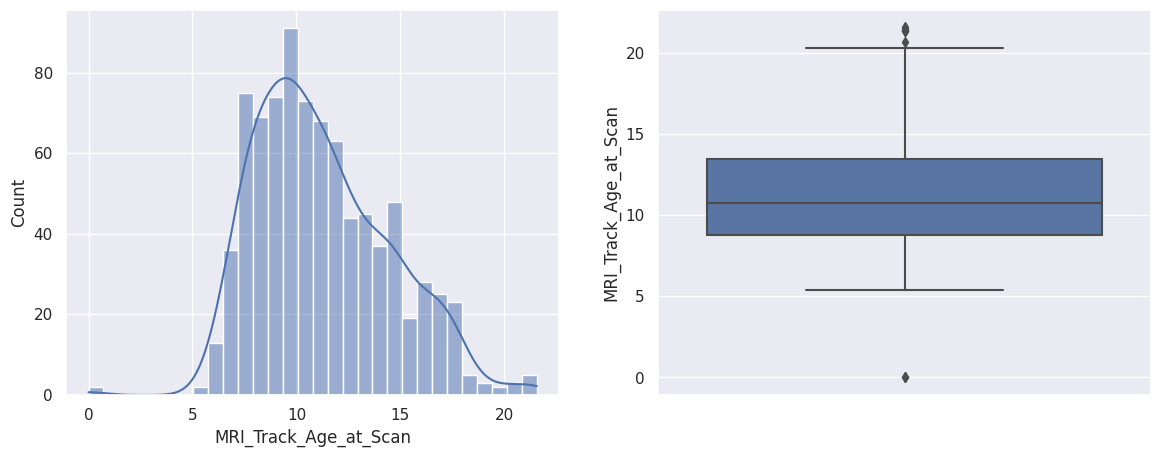

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2,
                               figsize=(14,5)) 

sns.histplot(data=df,
             x='MRI_Track_Age_at_Scan',
             bins=30, 
             kde=True,
             ax=ax1) 

sns.boxplot(data=df,
            y='MRI_Track_Age_at_Scan',
            ax=ax2) 

plt.show() 

 ### 📝 **Summary:** 

1. For the col: MRI_Track_Age_at_Scan, there are 360 missing values which account for 29.678% of the whole dataset.
2. Solution: Filled in the median which is less affected by outliers. 

In [17]:
df.groupby(['Sex_F', 'ADHD_Outcome'])['MRI_Track_Age_at_Scan'].median()   

Sex_F  ADHD_Outcome
0      0               10.775382
       1               10.824606
1      0               10.356091
       1               10.449007
Name: MRI_Track_Age_at_Scan, dtype: float64

In [18]:
df['MRI_Track_Age_at_Scan'] = df.groupby(['ADHD_Outcome', 'Sex_F'])['MRI_Track_Age_at_Scan'].transform(lambda x: x.fillna(x.median())) 

####  🧠 Col: Color Vision Score 

### Ishihara Color Vision Test

In [19]:
fig = px.box(data_frame=df, 
             y = 'ColorVision_CV_Score', 
             color = 'ADHD_Outcome', 
             title= 'Boxplot of Color Vision Score Group by ADHD Outcome',
             width = 700, 
             height = 500)  

fig.show() 

In [20]:
fig = px.scatter_matrix(data_frame=df, 
                        dimensions= ['ColorVision_CV_Score', 'ADHD_Outcome']) 

fig.update_traces(diagonal_visible=False) 
fig.show() 

In [21]:
df.groupby(['ADHD_Outcome', 'Sex_F'])['ColorVision_CV_Score'].median() 

ADHD_Outcome  Sex_F
0             0        14.0
              1        14.0
1             0        14.0
              1        14.0
Name: ColorVision_CV_Score, dtype: float64

### 📝 **Summary:** 

1. For the col: ColorVision_CV_Score, there are 23 missing values which account for 1.896% of the whole dataset.

2. The correlation between color vision and ADHD Outcome is weak.

3. The median and mean of color vision groupby ADHD Outcome... 


In [22]:
CV_median = df['ColorVision_CV_Score'].median() 
df['ColorVision_CV_Score'].fillna(CV_median, inplace=True)   

####  🧠 Col: EHQ_EHQ_Total

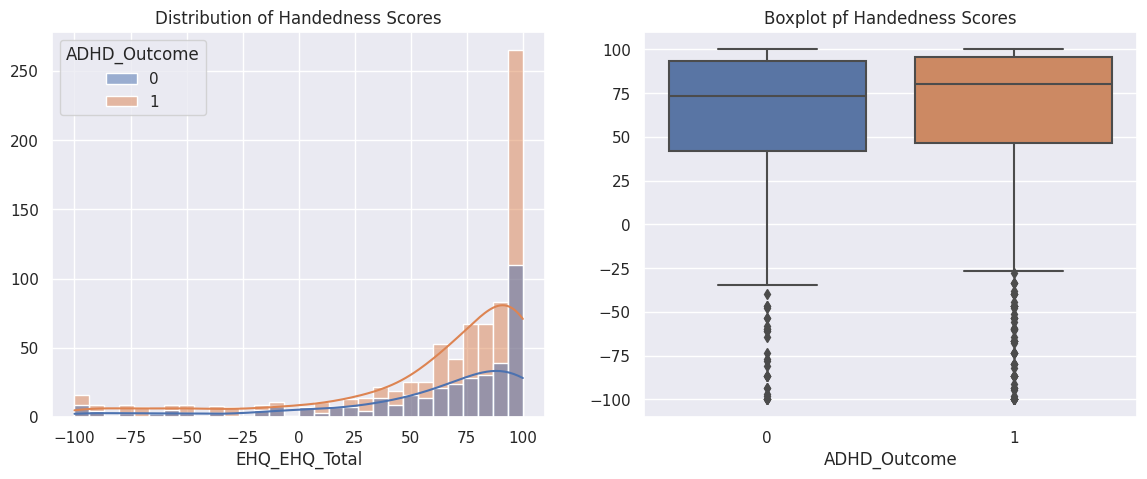

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(14, 5)) 

sns.histplot(data = df,
             x = 'EHQ_EHQ_Total', 
             bins=30,
             kde=True,
             hue='ADHD_Outcome', 
             ax = ax1) 

ax1.set_title('Distribution of Handedness Scores') 
ax1.set_ylabel('')


sns.boxplot(data=df,
            x='ADHD_Outcome', 
            y='EHQ_EHQ_Total',
            ax=ax2)   

ax2.set_title('Boxplot pf Handedness Scores') 
ax2.set_ylabel('')


plt.show() 

### 📝 **Summary:** 

1. ...

2. .... 

In [24]:
df['EHQ_EHQ_Total'] = df.groupby(['ADHD_Outcome', 'Sex_F'])['EHQ_EHQ_Total'].transform(
                                                                            lambda x: x.fillna(x.median())) 

In [25]:
df.groupby(['ADHD_Outcome','Sex_F'])['EHQ_EHQ_Total'].median()  

ADHD_Outcome  Sex_F
0             0        73.34
              1        73.34
1             0        80.00
              1        77.80
Name: EHQ_EHQ_Total, dtype: float64

####  🧠 APQ & SDQ 

In [26]:
# 1. since only 0.74% missing values + responses for questionnaire is discreate --> fill in mode is direct. 

# 2. but for the missing values in questionnaire, there is another methos: KNN Imputaion (try it first) 

In [27]:
def fill_na_with_mode(df, cols):
    for col in cols: 
        mode_var = df[col].mode()[0] 
        df[col] = df[col].fillna(mode_var) 
    return df  
    

APQ_cols = ['APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 
            'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP']

SDQ_cols = ['SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
           'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Generating_Impact',
           'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Conduct_Problems'] 


fill_na_with_mode(df,APQ_cols) 
fill_na_with_mode(df, SDQ_cols) 


,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,...,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN,1,0
1,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,...,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,1,0
2,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,...,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1
3,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,...,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,1
4,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,...,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,...,4,1.0,1.0,3.0,12.0,NaN,15.0,5.0,0,1
1209,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,...,1,0.0,0.0,3.0,21.0,40.0,21.0,40.0,1,0
1210,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,...,3,2.0,3.0,3.0,21.0,40.0,21.0,35.0,1,1
1211,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,...,4,0.0,1.0,3.0,18.0,35.0,18.0,45.0,1,0


In [28]:
df.isnull().sum().sort_values(ascending=False)

Barratt_Barratt_P2_Occ              222
Barratt_Barratt_P2_Edu              198
PreInt_Demos_Fam_Child_Race          54
PreInt_Demos_Fam_Child_Ethnicity     43
Barratt_Barratt_P1_Occ               31
Barratt_Barratt_P1_Edu               15
MRI_Track_Scan_Location               3
EHQ_EHQ_Total                         0
SDQ_SDQ_Peer_Problems                 0
ADHD_Outcome                          0
Basic_Demos_Study_Site                0
Basic_Demos_Enroll_Year               0
MRI_Track_Age_at_Scan                 0
SDQ_SDQ_Prosocial                     0
SDQ_SDQ_Internalizing                 0
ColorVision_CV_Score                  0
SDQ_SDQ_Hyperactivity                 0
SDQ_SDQ_Generating_Impact             0
SDQ_SDQ_Externalizing                 0
SDQ_SDQ_Emotional_Problems            0
SDQ_SDQ_Difficulties_Total            0
SDQ_SDQ_Conduct_Problems              0
APQ_P_APQ_P_PP                        0
APQ_P_APQ_P_PM                        0
APQ_P_APQ_P_OPD                       0


### 🔍 **2. Handling Categorical Attributes** 

In [29]:
df['Barratt_Barratt_P1_Edu'].mode()[0]

21.0

In [30]:
df[['Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ',
    'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ']].isnull().sum() 

Barratt_Barratt_P2_Edu    198
Barratt_Barratt_P2_Occ    222
Barratt_Barratt_P1_Edu     15
Barratt_Barratt_P1_Occ     31
dtype: int64

In [31]:
df[['Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ',
    'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ']][0:10]    

,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ
0,NaN,NaN,21.0,45.0
1,21.0,45.0,21.0,0.0
2,NaN,NaN,9.0,0.0
3,18.0,0.0,18.0,10.0
4,NaN,NaN,12.0,0.0
5,15.0,40.0,18.0,25.0
6,15.0,30.0,15.0,0.0
7,18.0,40.0,12.0,35.0
8,21.0,45.0,21.0,45.0
9,9.0,NaN,15.0,NaN


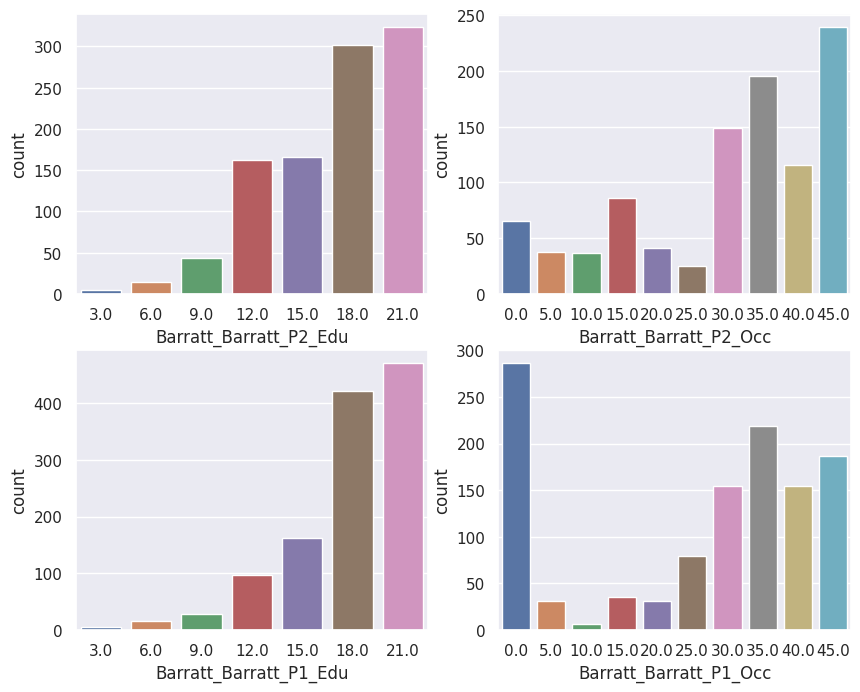

In [32]:
fig, axes = plt.subplots(2, 2, 
                        figsize=(10,8)) 
axes_flat = axes.ravel() 


Baratt_cols = ['Barratt_Barratt_P2_Edu','Barratt_Barratt_P2_Occ', 
              'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ'] 

for i, col in enumerate(Baratt_cols):
    sns.countplot(data=df,
                  x=col,
                  ax=axes_flat[i]
                 )     
    
plt.show() 

In [33]:
def fill_na_with_mode(df, cols):
    for col in cols: 
        mode_var = df[col].mode()[0] 
        df[col] = df[col].fillna(mode_var) 
    return df   

Demos_Barratt_Cols = [col for col in df.columns if col.startswith('Barratt') 
                      or col.startswith('PreInt')]  

fill_na_with_mode(df, Demos_Barratt_Cols)  


,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,...,4,1.0,0.0,3.0,21.0,45.0,21.0,45.0,1,0
1,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,...,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,1,0
2,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,...,1,1.0,2.0,2.0,9.0,0.0,21.0,45.0,0,1
3,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,...,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,1
4,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,...,1,0.0,1.0,2.0,12.0,0.0,21.0,45.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,...,4,1.0,1.0,3.0,12.0,0.0,15.0,5.0,0,1
1209,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,...,1,0.0,0.0,3.0,21.0,40.0,21.0,40.0,1,0
1210,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,...,3,2.0,3.0,3.0,21.0,40.0,21.0,35.0,1,1
1211,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,...,4,0.0,1.0,3.0,18.0,35.0,18.0,45.0,1,0


In [34]:
loc_mode = df['MRI_Track_Scan_Location'].mode()[0]
df['MRI_Track_Scan_Location'] = df['MRI_Track_Scan_Location'].fillna(loc_mode) 

In [35]:
df.isnull().sum().sort_values(ascending=False)

EHQ_EHQ_Total                       0
SDQ_SDQ_Peer_Problems               0
ADHD_Outcome                        0
Barratt_Barratt_P2_Occ              0
Barratt_Barratt_P2_Edu              0
Barratt_Barratt_P1_Occ              0
Barratt_Barratt_P1_Edu              0
MRI_Track_Scan_Location             0
PreInt_Demos_Fam_Child_Race         0
PreInt_Demos_Fam_Child_Ethnicity    0
Basic_Demos_Study_Site              0
Basic_Demos_Enroll_Year             0
MRI_Track_Age_at_Scan               0
SDQ_SDQ_Prosocial                   0
SDQ_SDQ_Internalizing               0
ColorVision_CV_Score                0
SDQ_SDQ_Hyperactivity               0
SDQ_SDQ_Generating_Impact           0
SDQ_SDQ_Externalizing               0
SDQ_SDQ_Emotional_Problems          0
SDQ_SDQ_Difficulties_Total          0
SDQ_SDQ_Conduct_Problems            0
APQ_P_APQ_P_PP                      0
APQ_P_APQ_P_PM                      0
APQ_P_APQ_P_OPD                     0
APQ_P_APQ_P_INV                     0
APQ_P_APQ_P_

# 🎥   ***Data Visualization***    

### 🔍 **1. Strengths and Difficulties Questionnaire (SDQ)**  

 ####  📊 ***Distribution & Boxplot***  

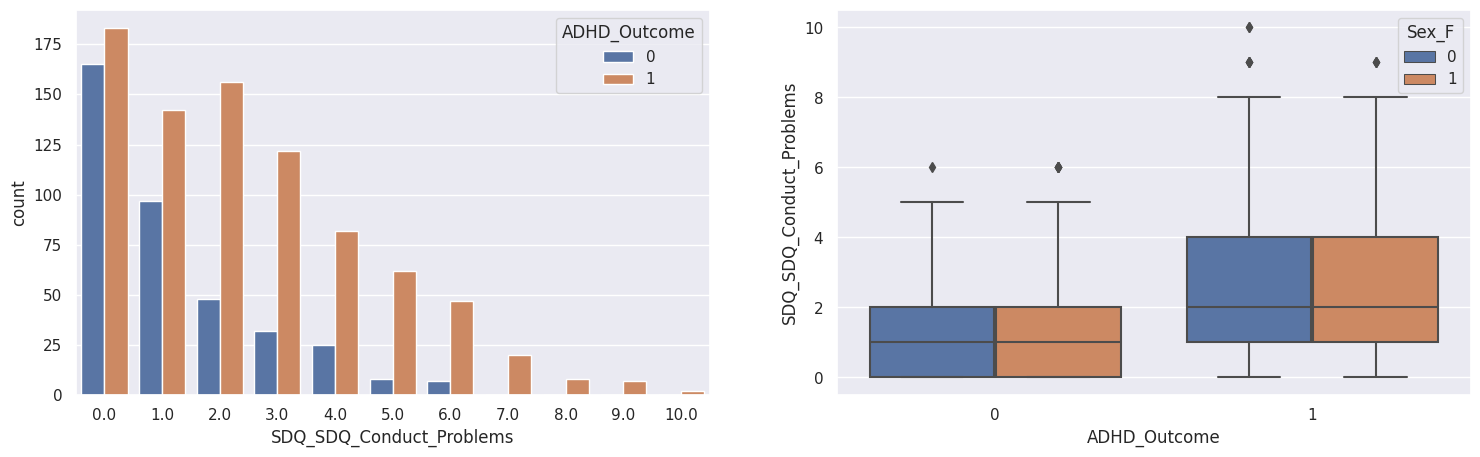

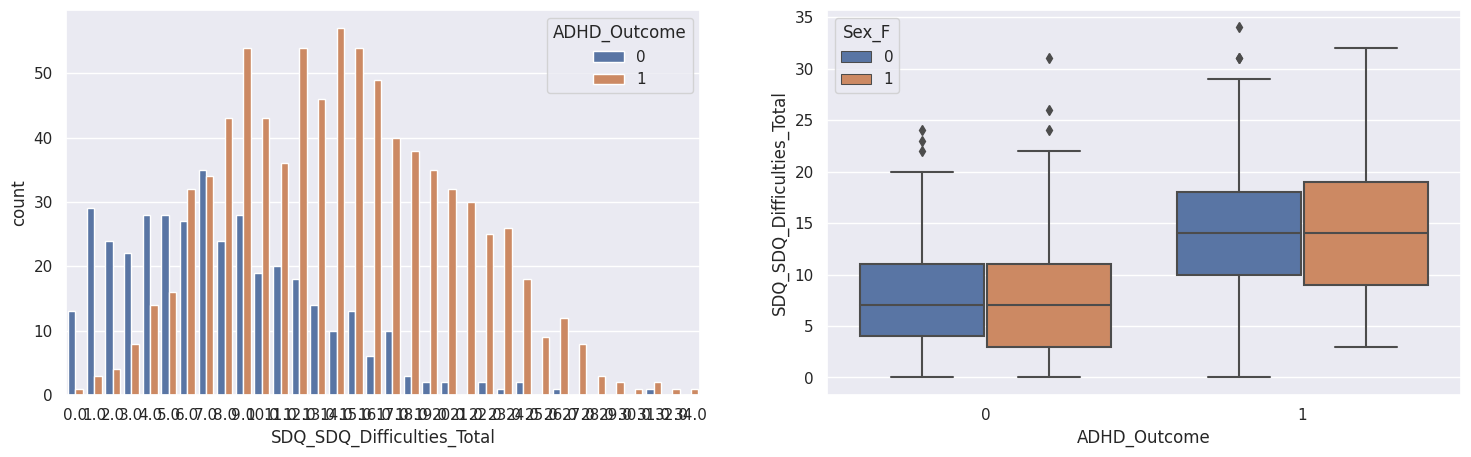

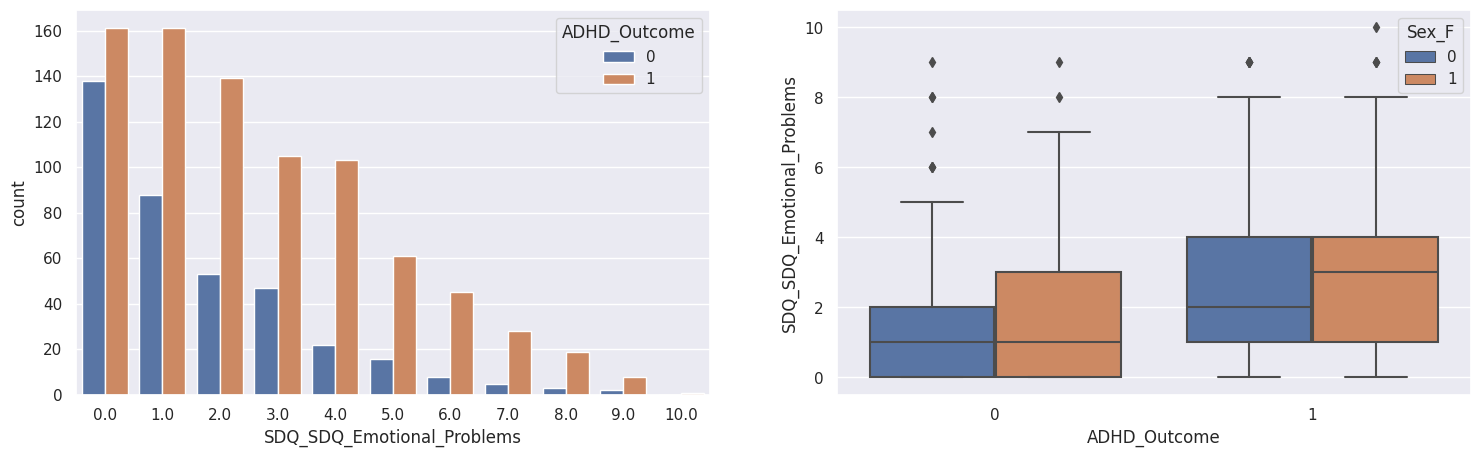

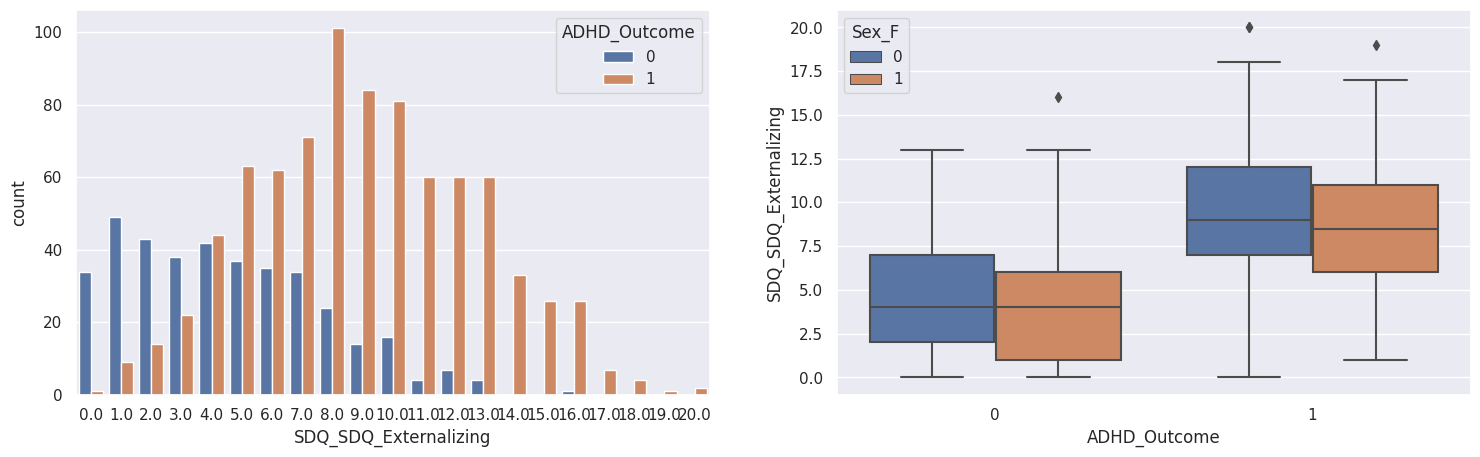

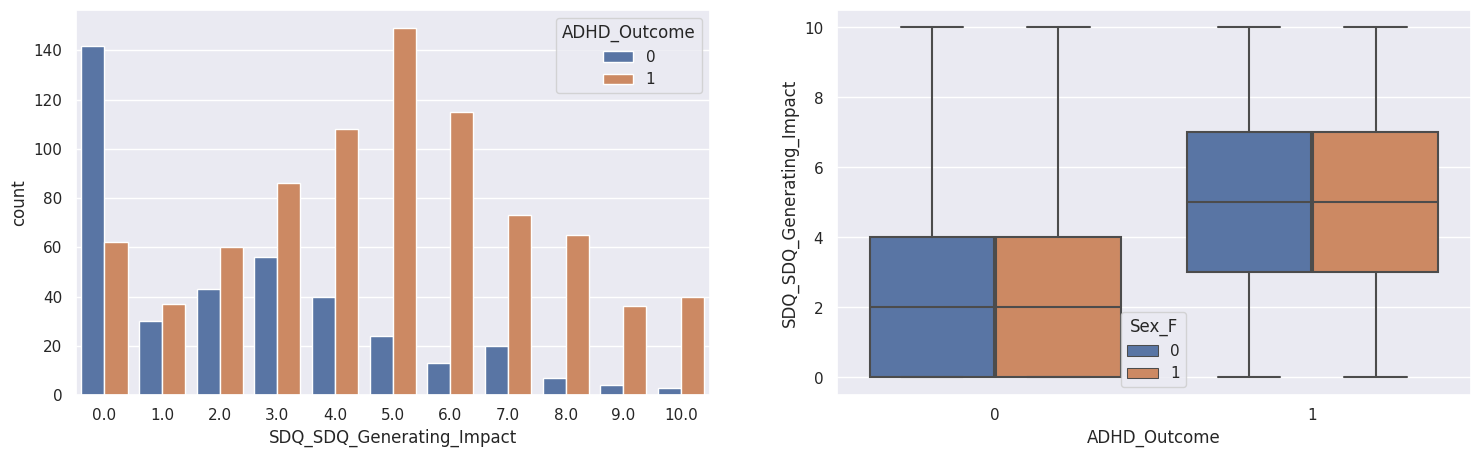

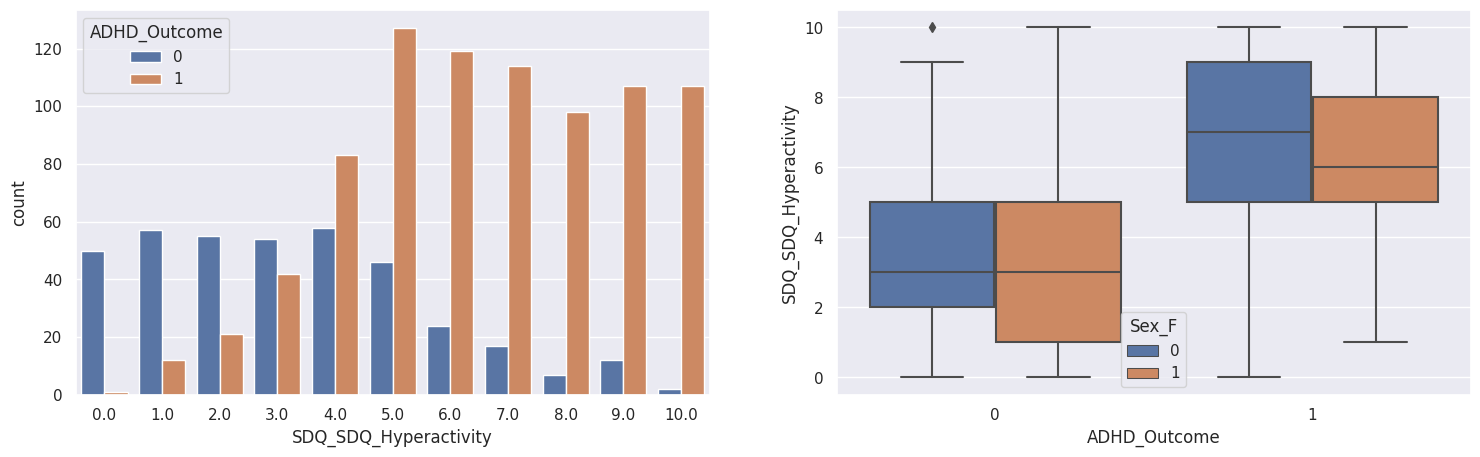

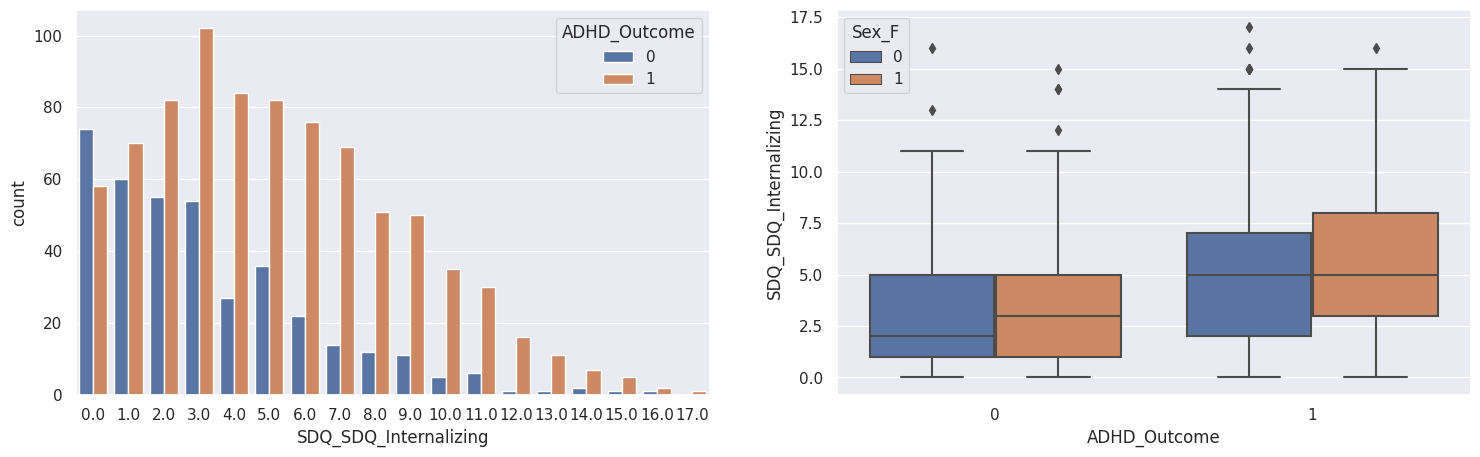

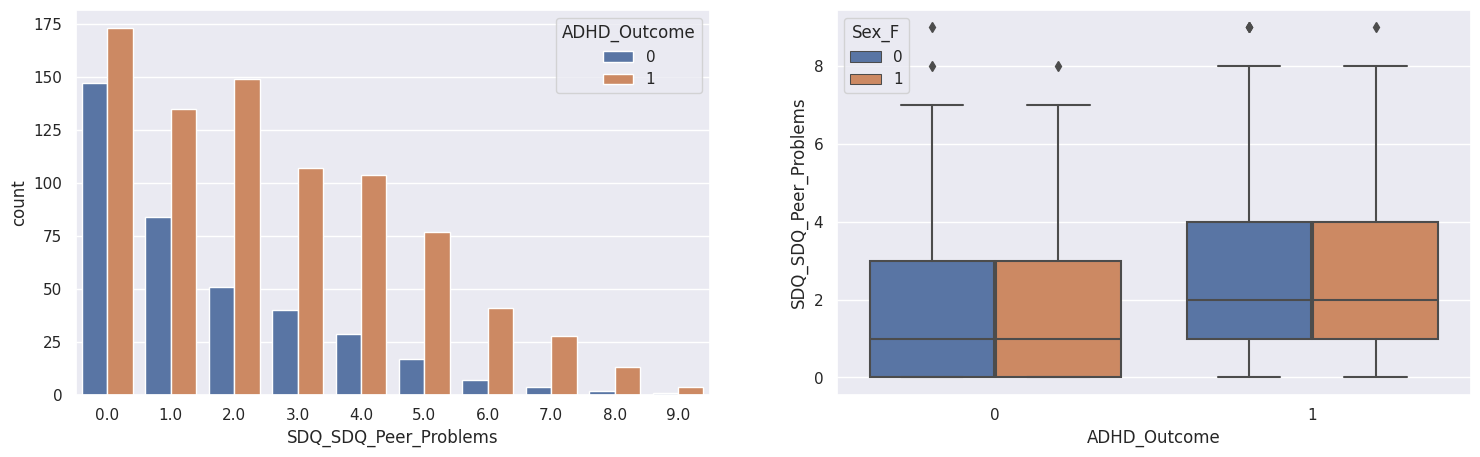

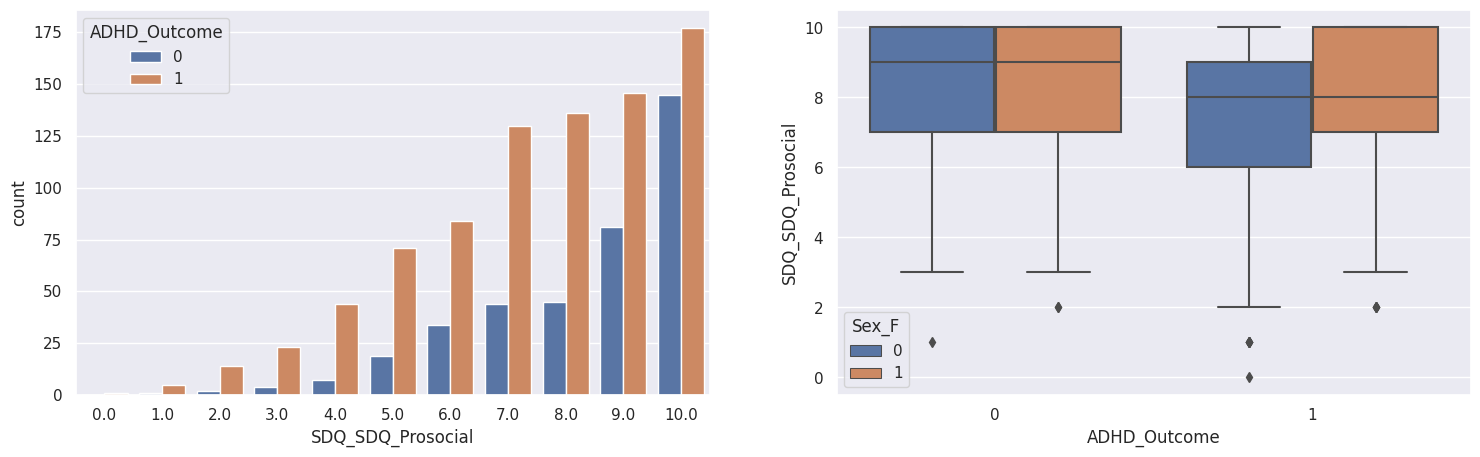

In [36]:


SDQ_cols = [col for col in df.columns if col.startswith('SDQ')]    
target_vars = ['ADHD_Outcome', 'Sex_F'] 


for i, col in enumerate(SDQ_cols):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5)) 
    sns.countplot(data=df,
              x=col,
              hue=target_vars[0],
              ax=ax1) 
    sns.boxplot(data=df,
            y = col,
            x = target_vars[0], 
            hue= target_vars[1],  
            ax=ax2)  

plt.show() 


 ####  📊 ***Correlation with ADHD***   

<Axes: >

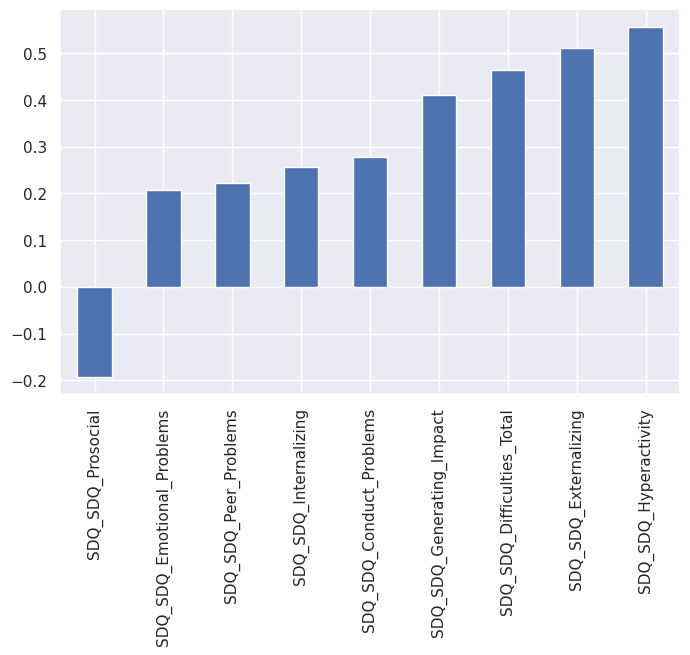

In [37]:
Corr_SDQ_ADHD = df[SDQ_cols + ['ADHD_Outcome']].corr()['ADHD_Outcome'].drop('ADHD_Outcome').sort_values()  

fig = plt.figure(figsize=(8,5))
Corr_SDQ_ADHD.plot(kind='bar') 

### 📝 **Summary:**  

1. ...
   
2. ...

### 🔍 **2. Alabama Parenting Questionnaire (APQ)**  

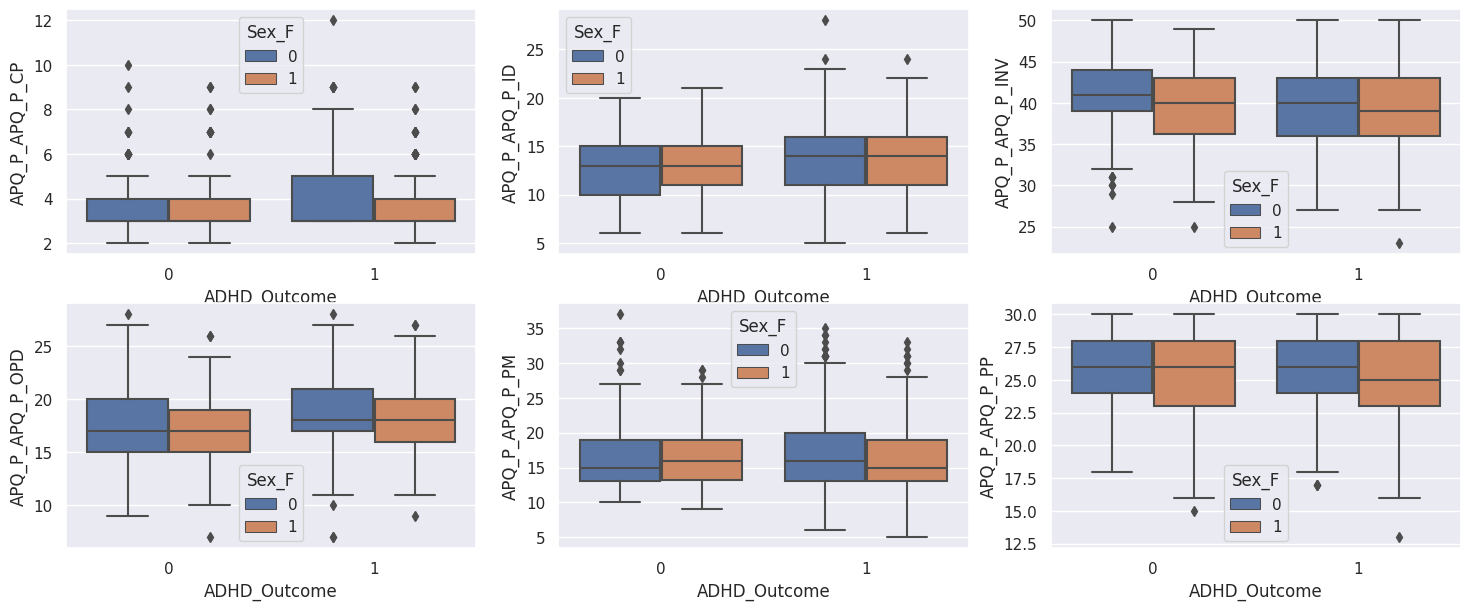

In [38]:
APQ_cols = [col for col in df.columns if col.startswith('APQ')] 
target_vars = ['ADHD_Outcome', 'Sex_F'] 

fig, axes = plt.subplots(2, 3, figsize=(18,7)) 
axes_flat = axes.ravel() 

for i, col in enumerate(APQ_cols):
    sns.boxplot(data=df,
                y=col,
                x= target_vars[0], 
                hue = target_vars[1],
                ax = axes_flat[i])   
plt.show() 

### 📝 **Summary:**   

1. ...
2. ...
3. 

### 🔍 **3. Clinical Measurements**   

**1.Edinburgh Handedness Questionnaire**

**2.Ishihara Color Test**

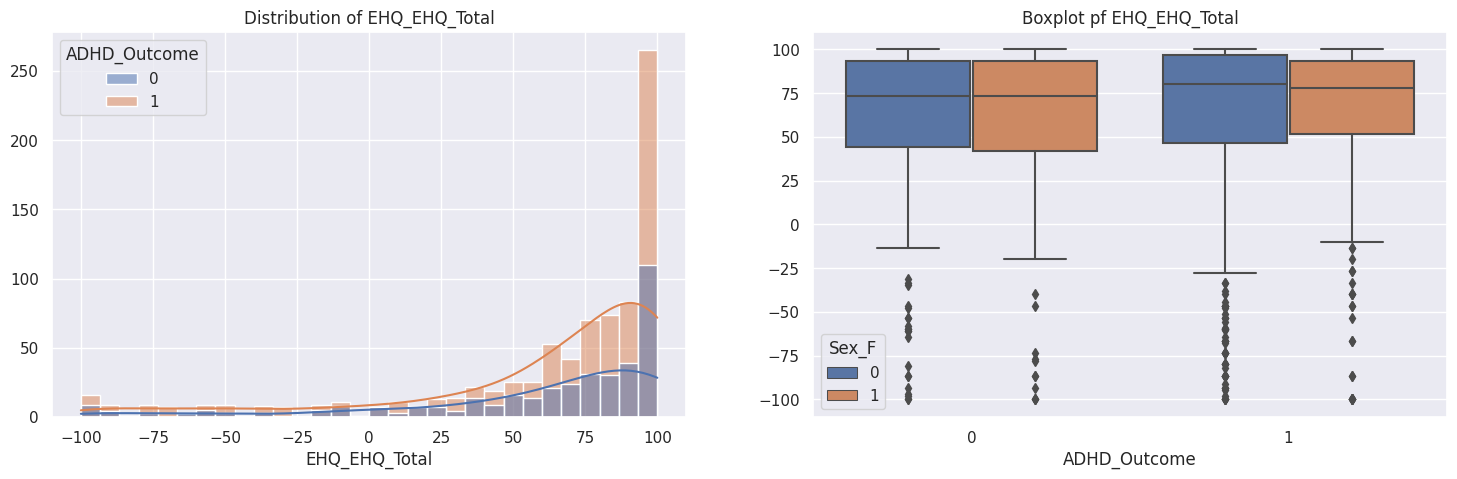

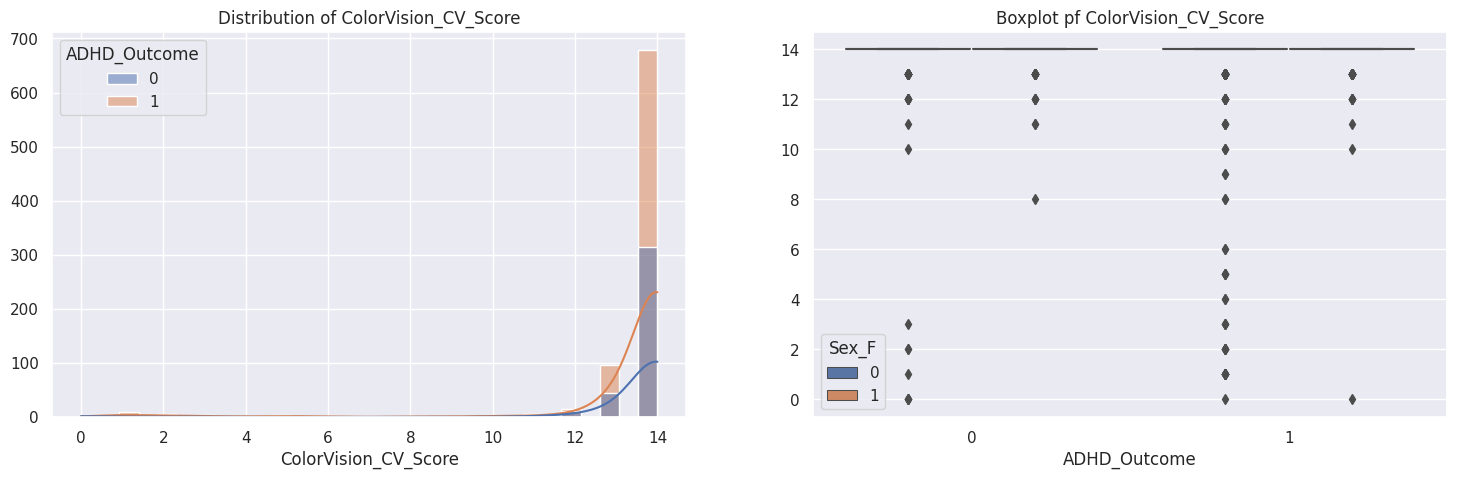

In [39]:
clinical_cols = ['EHQ_EHQ_Total', 'ColorVision_CV_Score'] 

for i, col in enumerate(clinical_cols):
    fig, (ax1, ax2) = plt.subplots(1, 2, 
                                   figsize=(18, 5)) 
    sns.histplot(data = df,
             x = col, 
             bins=30,
             kde=True,
             hue='ADHD_Outcome', 
             ax = ax1) 
    ax1.set_title(f'Distribution of {col}')  
    ax1.set_ylabel('')


    sns.boxplot(data=df,
                x='ADHD_Outcome', 
                y=col,
                hue='Sex_F', 
                ax=ax2)   

    ax2.set_title(f'Boxplot pf {col}')  
    ax2.set_ylabel('')


plt.show() 